# MPI Subnational

* [Importing libraries and packages](#importing)
* [Loading data](#loading-data)
* [Data description and distribution](#on-data)
* [Wrangling](#wrangling)

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# mathematical operations and data manipulation
import pandas as pd

# data visualisation
import seaborn as sns

# Warnings
import warnings

warnings.filterwarnings("ignore")

<a id="loading-data"></a>
## Loading data

In [2]:
data_path = "../datasets"

In [3]:
data_subnational = pd.read_csv(f"{data_path}/MPI_subnational.csv")
# Shape of the datasets
print("Shape of the MPI_subnational dataset: ", data_subnational.shape)

Shape of the MPI_subnational dataset:  (984, 8)


<a id="on-data"></a>
## Data description and distribution

<a id="features"></a>
### Features

In [4]:
data_subnational.tail()

ISO country code   Country Sub-national region        World region  \
979              ZWE  Zimbabwe    Mashonaland West  Sub-Saharan Africa   
980              ZWE  Zimbabwe            Masvingo  Sub-Saharan Africa   
981              ZWE  Zimbabwe  Matabeleland North  Sub-Saharan Africa   
982              ZWE  Zimbabwe  Matabeleland South  Sub-Saharan Africa   
983              ZWE  Zimbabwe            Midlands  Sub-Saharan Africa   

     MPI National  MPI Regional  Headcount Ratio Regional  \
979         0.152         0.192                      43.7   
980         0.152         0.174                      38.9   
981         0.152         0.238                      53.4   
982         0.152         0.164                      38.2   
983         0.152         0.176                      40.5   

     Intensity of deprivation Regional  
979                               44.1  
980                               44.7  
981                               44.5  
982                               42.8  
983                               43.5

- ISO: [Unique ID for country (formed of 3 letters)](https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv)
- Country: country name
- Sub-national region: Region within country
- World region: General global region
- MPI National: Overall aggregate national MPI score
- MPI Regional: Multi-dimensional poverty index for this region
- Headcount Ratio Regional: Poverty headcount ratio (% of population listed as poor) this region
- Intensity of deprivation Regional: Average distance below the poverty line of those listed as poor in this region

<a id="plots"></a>
### Exploratory plots

array([[<AxesSubplot:title={'center':'MPI National'}>,
        <AxesSubplot:title={'center':'MPI Regional'}>],
       [<AxesSubplot:title={'center':'Headcount Ratio Regional'}>,
        <AxesSubplot:title={'center':'Intensity of deprivation Regional'}>]],
      dtype=object)

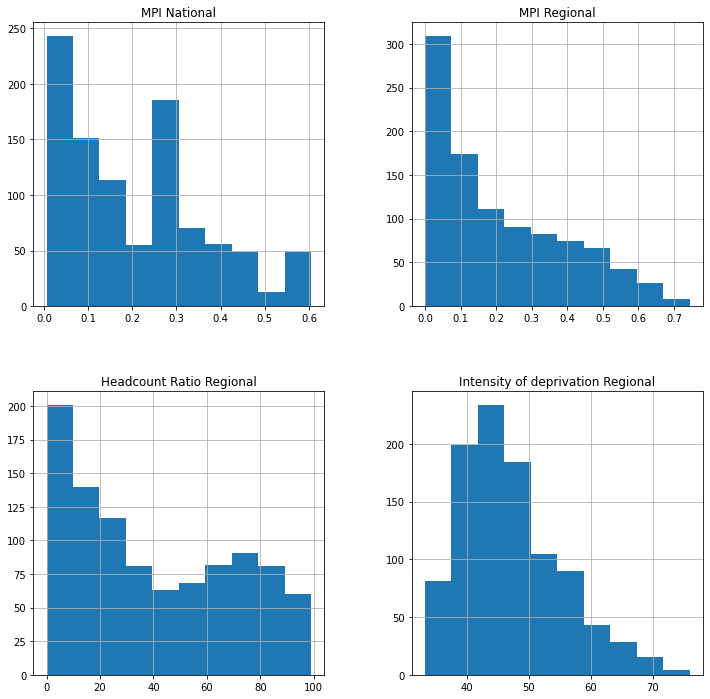

In [5]:
num = data_subnational.select_dtypes(include=["int", "float"])
num.hist(figsize=(12, 12))

<a id="types"></a>
### Data types

In [6]:
data_subnational.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ISO country code                   984 non-null    object 
 1   Country                            984 non-null    object 
 2   Sub-national region                984 non-null    object 
 3   World region                       984 non-null    object 
 4   MPI National                       984 non-null    float64
 5   MPI Regional                       984 non-null    float64
 6   Headcount Ratio Regional           984 non-null    float64
 7   Intensity of deprivation Regional  983 non-null    float64
dtypes: float64(4), object(4)
memory usage: 61.6+ KB


<a id="missing"></a>
### Missing values

In [7]:
data_subnational.isnull().sum()

ISO country code                     0
Country                              0
Sub-national region                  0
World region                         0
MPI National                         0
MPI Regional                         0
Headcount Ratio Regional             0
Intensity of deprivation Regional    1
dtype: int64

<a id="duplicates"></a>
### Duplicate values

In [8]:
format(len(data_subnational[data_subnational.duplicated()]))

'0'

<a id="statistics"></a>
### Standard statistical measures

In [9]:
data_subnational.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

MPI National  MPI Regional  Headcount Ratio Regional  \
count    984.000000    984.000000                984.000000   
mean       0.204107      0.211330                 40.184451   
std        0.160248      0.183621                 29.981403   
min        0.006000      0.000000                  0.000000   
25%        0.066000      0.053000                 12.475000   
50%        0.174000      0.155000                 33.950000   
75%        0.303000      0.341500                 66.725000   
90%        0.430000      0.498700                 85.540000   
95%        0.535000      0.554000                 90.185000   
99%        0.564000      0.661340                 96.900000   
max        0.605000      0.744000                 99.000000   

       Intensity of deprivation Regional  
count                         983.000000  
mean                           47.180977  
std                             8.047225  
min                            33.300000  
25%                            41.400000  
50%                            45.600000  
75%                            51.900000  
90%                            58.500000  
95%                            62.680000  
99%                            70.400000  
max                            75.900000

<a id="outliers"></a>
### Outliers

<AxesSubplot:>

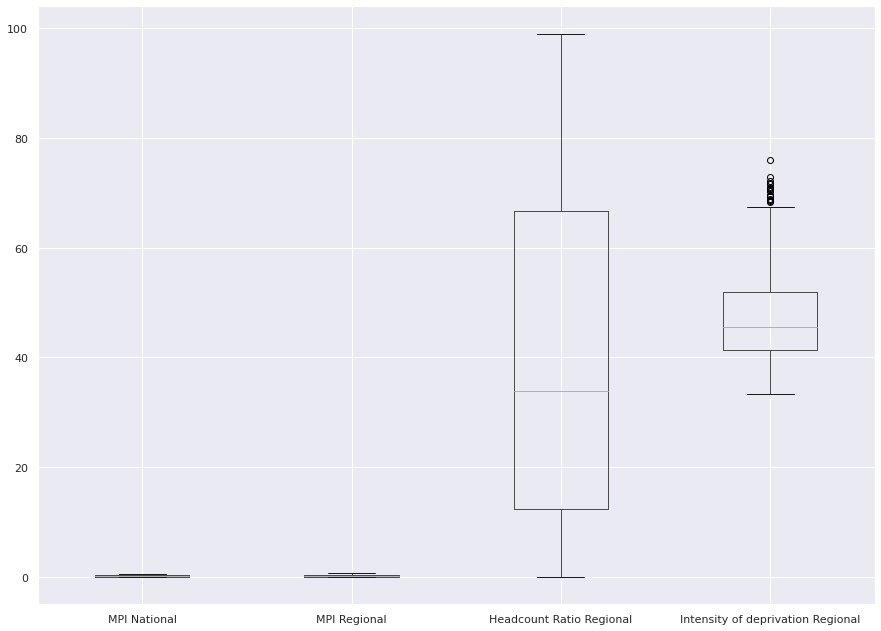

In [10]:
sns.set(rc={"figure.figsize": (15, 11)})
data_subnational.boxplot()

<a id="conclusions-explore"></a>
### Exploration conclusions

- Relatively small dataset
- No duplicates
- One missing value in the Regional Intensity of deprivation feature
- Found outliers in the Regional Intensity of deprivation feature

<a id="wrangling"></a>
## Data wrangling

<a id="deal-missing-data"></a>
### Dealing with missing data

In [11]:
# Show the row with missing data
data_subnational[data_subnational["Intensity of deprivation Regional"].isna()]

ISO country code Country Sub-national region                 World region  \
730              PER    Peru              Callao  Latin America and Caribbean   

     MPI National  MPI Regional  Headcount Ratio Regional  \
730         0.043           0.0                       0.0   

     Intensity of deprivation Regional  
730                                NaN

Best to drop this row, not much is known, as Headcount and MPI Regional are both set to 0 also.

In [12]:
data_subnational.count()

ISO country code                     984
Country                              984
Sub-national region                  984
World region                         984
MPI National                         984
MPI Regional                         984
Headcount Ratio Regional             984
Intensity of deprivation Regional    983
dtype: int64

In [13]:
data_subnational = data_subnational.dropna()
print(data_subnational.isna().any(), "\n")

ISO country code                     False
Country                              False
Sub-national region                  False
World region                         False
MPI National                         False
MPI Regional                         False
Headcount Ratio Regional             False
Intensity of deprivation Regional    False
dtype: bool 



In [14]:
data_subnational.count()

ISO country code                     983
Country                              983
Sub-national region                  983
World region                         983
MPI National                         983
MPI Regional                         983
Headcount Ratio Regional             983
Intensity of deprivation Regional    983
dtype: int64

<a id="deal-outliers"></a>
### Dealing with outliers

In [15]:
# Outliers in the Regional Intensity of deprivation feature
print(
    "skewness value of Intensity of deprivation Regional: ",
    data_subnational["Intensity of deprivation Regional"].skew(),
)

skewness value of Intensity of deprivation Regional:  0.7914772260372314


The skewness value of the Regional Intensity of deprivation feature of the subnational dataset is within the range of -1 to 1 for a normal distribution.

We have chosen not to remove outliers because in this context those can be very informative in that they could point out countries that are in critical condition.

In [16]:
data_subnational.to_csv(
    f"{data_path}/MPI_subnational_cleaned.csv", index=False
)